# Classes and Objects
This is our week 3 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [19]:
import math
import random
from collections import defaultdict

import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`!
  * and every `object` has a `type`! 
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`!
  * even a `function` is an `object` !!
  * an `object` has attributes, you can just add new attributes to any object (but don't!)
 
A little code to demonstrate...

In [20]:
# demo code

## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [21]:
class Circle:
    """ Representation for the data and operations on a circle """

    def area(self):
        """ Return the area of this circle """

    def move(self, offset):
        """ Move this circle by given (x,y) offset """

    def distance(self, other):
        """ Return the distance between this circle and the other one """

    def intersects(self, other):
        """ Return True iff this circle intersects the other one """


In [22]:
# Test Circle class


## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


{22: 1091, 20: 812, 21: 945, 23: 1123, 18: 467, 24: 1168, 25: 1066, 26: 935, 16: 188, 31: 199, 14: 74, 17: 315, 19: 625, 27: 722, 34: 35, 29: 420, 28: 571, 32: 138, 13: 31, 30: 313, 33: 66, 15: 135, 11: 10, 35: 17, 12: 16, 10: 4, 37: 3, 36: 6, 9: 3, 8: 1, 38: 1}


[]

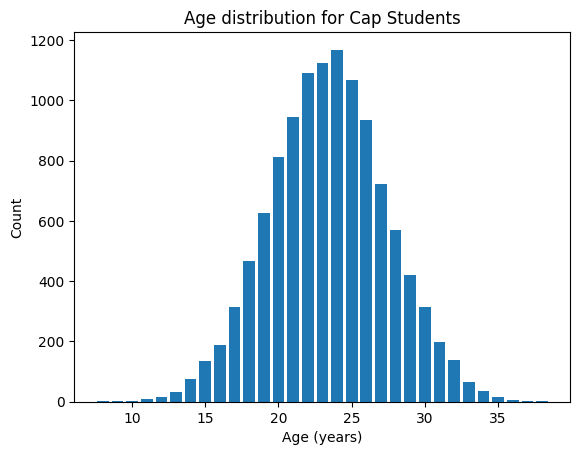

In [23]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
fig, ax = plt.subplots()
ax.set_title("Age distribution for Cap Students")
ax.set_xlabel('Age (years)')
ax.set_ylabel('Count')

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.plot()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [24]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

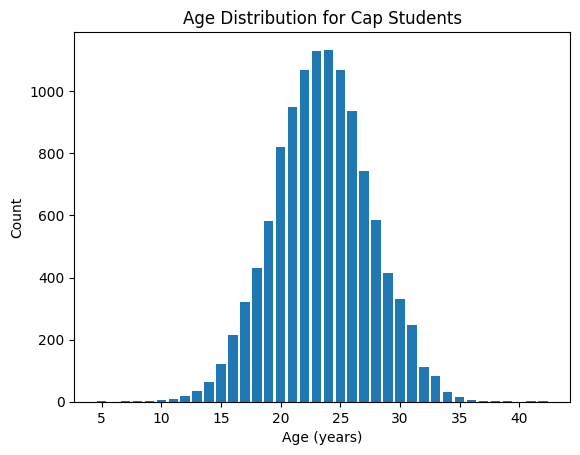

In [25]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()